In [1]:
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime
import  sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 10]


In [2]:
import seaborn as sns

## 釣果分析プロトタイプ

## アジの釣果

In [21]:
conn = sqlite3.connect("../fishing_result.db")
sql = '''
select
	r.Date,
	r.Count,
	r.SizeMin,
	r.SizeMax,
    c.WaterTemp,
    c.Quantity
from
	fishing_results r,
    fishing_comments c
where
	r.Date = c.Date
	and r.Point = c.Point
	and r.Species = 'アジ'
	and r.Point = 'Daikoku'
'''
df=pd.read_sql_query(sql, conn)
df['Date'] = pd.to_datetime(df.Date)


## 平日、休日列追加

In [22]:
# 土日祝日化判定
import datetime
import jpholiday

def isBizDay(Date):
    #Date = datetime.date(int(DATE[0:4]), int(DATE[4:6]), int(DATE[6:8]))
    if Date.weekday() >= 5 or jpholiday.is_holiday(Date):
        return 0
    else:
        return 1


In [24]:
df['BizDay'] = df.apply(lambda x: isBizDay(x.Date), axis=1)
df = df.set_index('Date')

,Count,SizeMin,SizeMax,WaterTemp,Quantity,BizDay
Date,,,,,,
2021-04-02,147.0,10.0,25.0,16.0,289.0,1
2021-04-01,134.0,13.0,25.0,16.0,232.0,1
2021-03-31,130.0,15.0,25.0,15.5,298.0,1
2021-03-30,192.0,15.0,20.0,15.0,305.0,1
2021-03-29,42.0,13.0,17.0,14.0,299.0,1


In [57]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['DayOfYear'] = df.index.dayofyear

df.head()

,Count,SizeMin,SizeMax,WaterTemp,Quantity,BizDay,Year,Month,DayOfYear
Date,,,,,,,,,
2021-04-02,147.0,10.0,25.0,16.0,289.0,1,2021,4,92
2021-04-01,134.0,13.0,25.0,16.0,232.0,1,2021,4,91
2021-03-31,130.0,15.0,25.0,15.5,298.0,1,2021,3,90
2021-03-30,192.0,15.0,20.0,15.0,305.0,1,2021,3,89
2021-03-29,42.0,13.0,17.0,14.0,299.0,1,2021,3,88


# 入場者数

<AxesSubplot:xlabel='BizDay', ylabel='Quantity'>

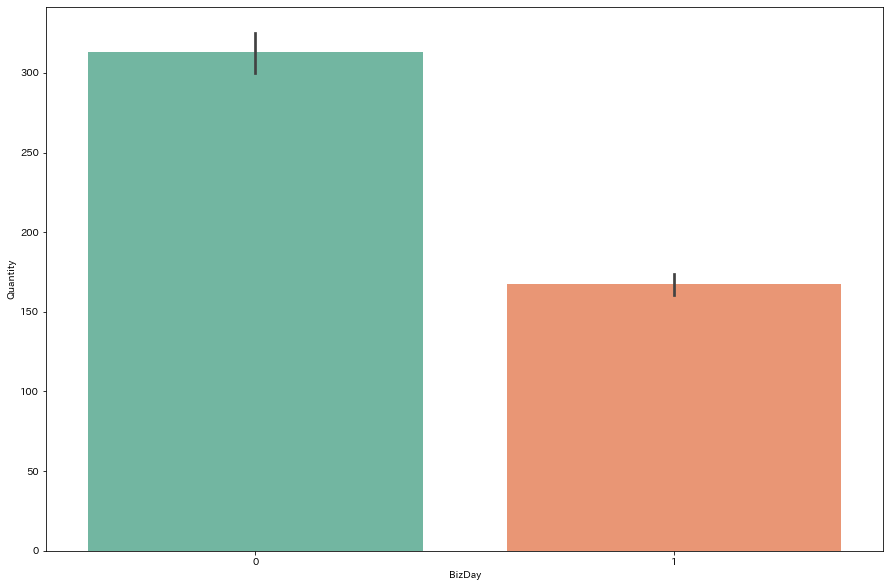

In [58]:
sns.barplot(x='BizDay',y='Quantity', data=df, palette='Set2')

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

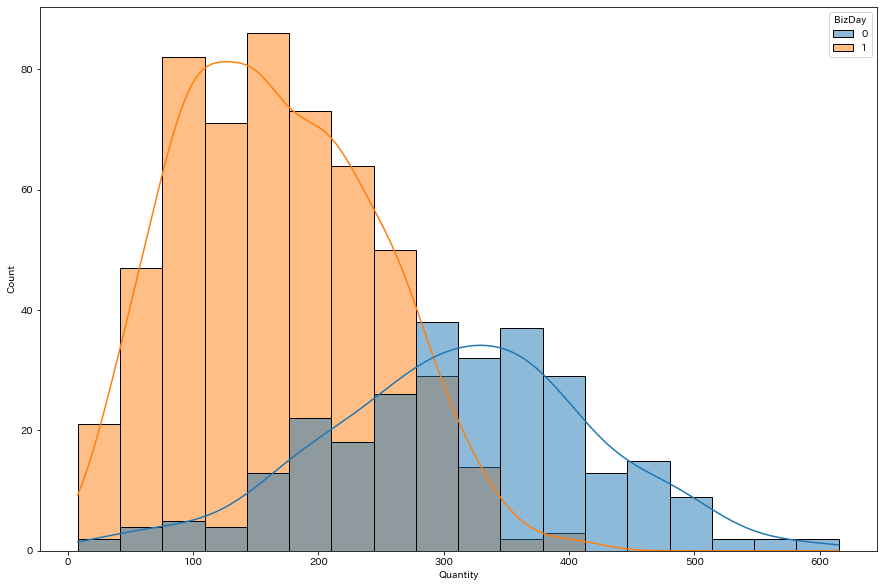

In [59]:
sns.histplot(data=df, x='Quantity', hue='BizDay', kde=True)


<AxesSubplot:xlabel='Count', ylabel='Count'>

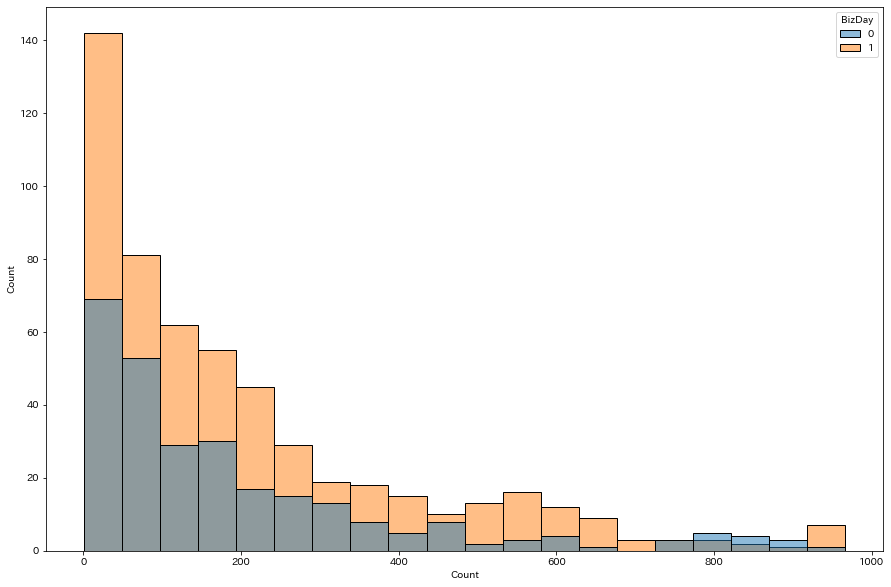

In [60]:
sns.histplot(data=df, x='Count', hue='BizDay', fill=True)

# 平日の釣果分析

<AxesSubplot:xlabel='DayOfYear', ylabel='Count'>

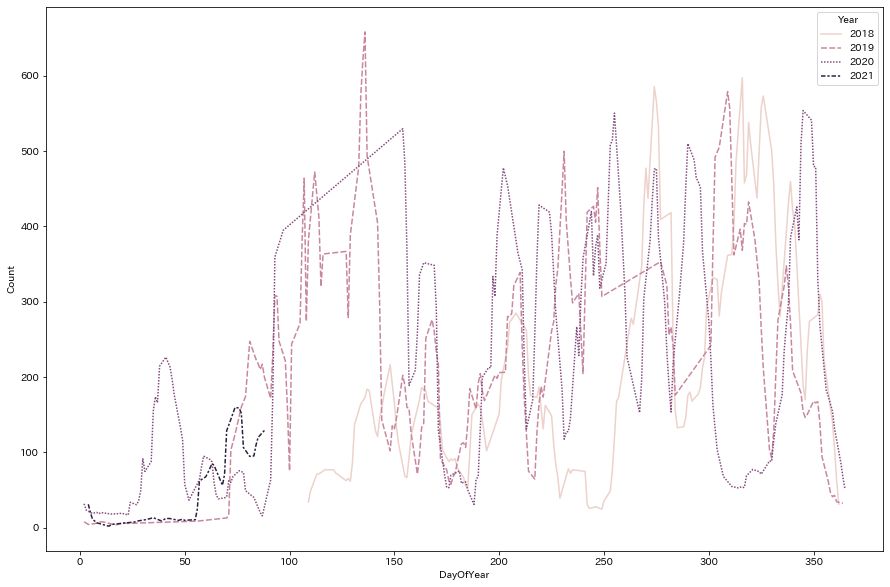

In [90]:
#sns.jointplot(data=df, x='Count', y='DayOfYear', hue='BizDay', fill=True)
#sns.jointplot(data=df, x='Month', y='Count')
df2 = df.query('BizDay == 1').rolling(window=5).mean()
df2['Year'] = df2.index.year
df2['Month'] = df2.index.month
df2['DayOfYear'] = df2.index.dayofyear

#df2['CountAve'] = df2['Count'].resample('W').mean()
df2.head()
sns.lineplot(data=df2, x='DayOfYear', y='Count', hue='Year', style='Year')
#sns.lineplot(data=df2.CountAve)
    

<AxesSubplot:xlabel='Date', ylabel='WaterTemp'>

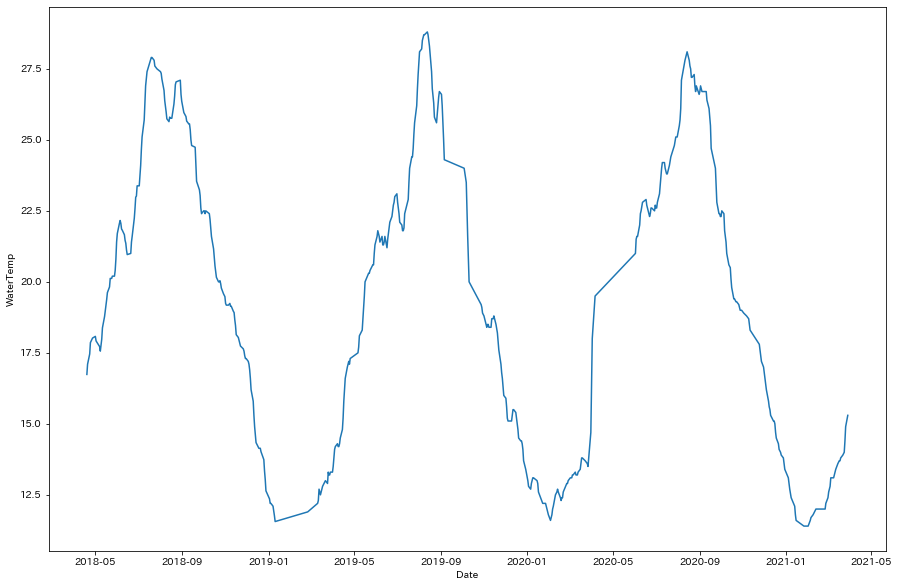

In [96]:
sns.lineplot(data=df2, x='Date', y='WaterTemp')


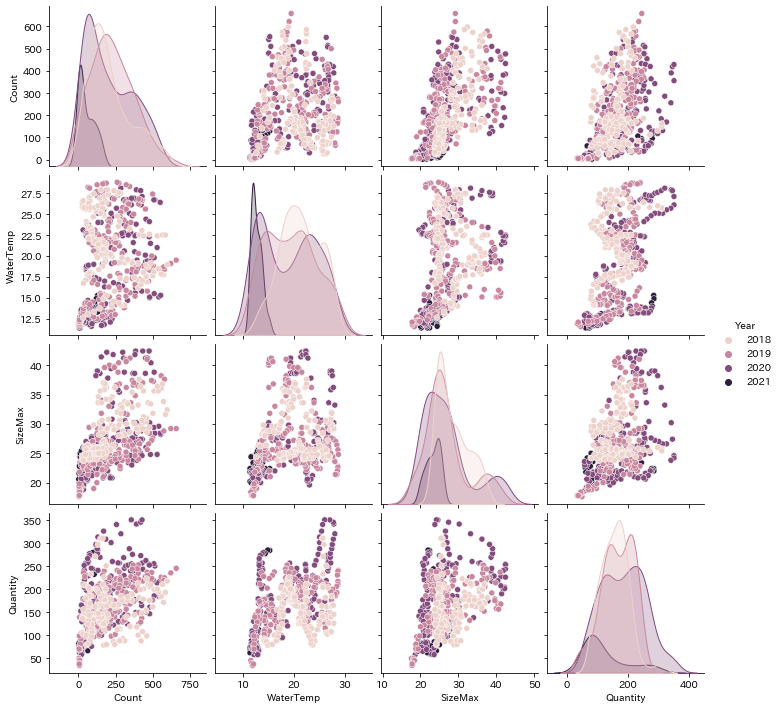

In [102]:
#df2[['Count','WaterTemp','SizeMax','Quantity']].head()
sns.pairplot(df2[['Count','WaterTemp','SizeMax','Quantity','Year']], hue="Year")

In [103]:
df2.head()

,Count,SizeMin,SizeMax,WaterTemp,Quantity,BizDay,Year,Month,DayOfYear
Date,,,,,,,,,
2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,2021,4,92
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,2021,4,91
2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,2021,3,90
2021-03-30,NaN,NaN,NaN,NaN,NaN,NaN,2021,3,89
2021-03-29,129.0,13.2,22.4,15.3,284.6,1.0,2021,3,88


# アジ分析

<AxesSubplot:xlabel='Date'>

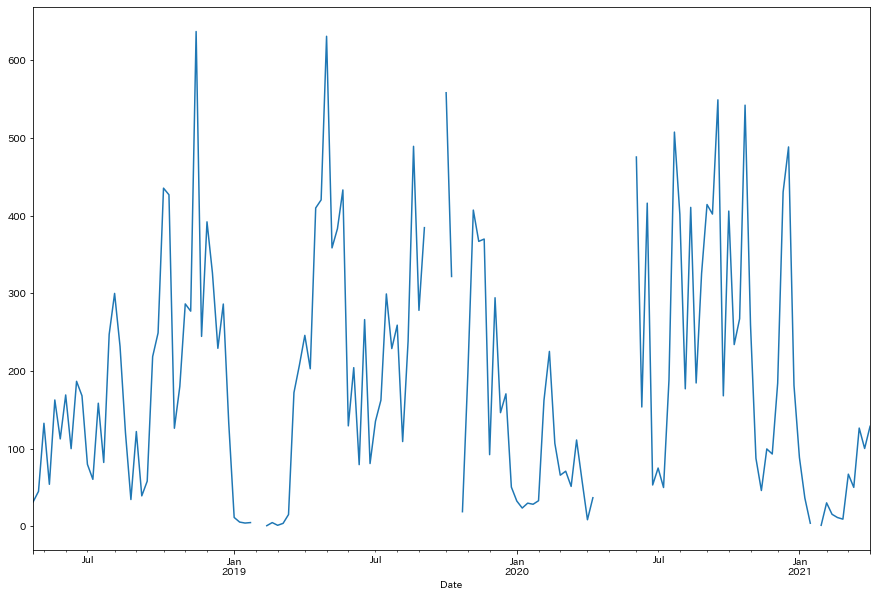

In [26]:
# ダウンサンプリング
df_w = df['Count'].resample('W').mean()
df_w.plot()


<AxesSubplot:xlabel='Date'>

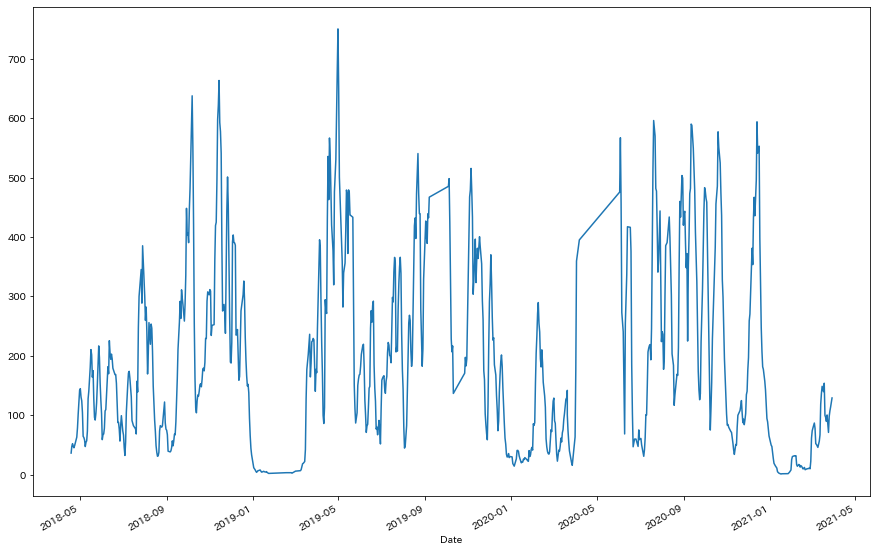

In [23]:
# 移動平均
df_w = df['Count'].rolling(window=5).mean()
df_w.plot()

In [36]:
# 年度別
df_y = df.rolling(window=5).mean()
df_y['day'] = df.index.dayofyear
df_y['Year'] = df.index.year
df_y.head()

,Count,SizeMin,SizeMax,WaterTemp,Quantity,doy,Year,day
Date,,,,,,,,
2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,2021,92
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,2021,91
2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,2021,90
2021-03-30,NaN,NaN,NaN,NaN,NaN,NaN,2021,89
2021-03-29,129.0,13.2,22.4,15.3,284.6,90.0,2021,88


In [138]:
#df3 = df2[['Count', 'SizeMax','WaterTemp', 'Quantity']]
df3 = df2[['SizeMax','WaterTemp']]
df3 = df3.stack()

In [139]:
df3 = df3.reset_index()
df3 = df3.set_index('Date')
df3.columns = ['Metric', 'Value']
df3

,Metric,Value
Date,,
2021-03-29,SizeMax,22.40
2021-03-29,WaterTemp,15.30
2021-03-26,SizeMax,22.00
2021-03-26,WaterTemp,14.90
2021-03-25,SizeMax,22.40
...,...,...
2018-04-23,WaterTemp,17.46
2018-04-20,SizeMax,24.80
2018-04-20,WaterTemp,17.10


In [140]:
df3['Year'] = df3.index.year
df3['Month'] = df3.index.month
df3['day'] = df3.index.dayofyear
df3.head()

,Metric,Value,Year,Month,day
Date,,,,,
2021-03-29,SizeMax,22.4,2021,3,88
2021-03-29,WaterTemp,15.3,2021,3,88
2021-03-26,SizeMax,22.0,2021,3,85
2021-03-26,WaterTemp,14.9,2021,3,85
2021-03-25,SizeMax,22.4,2021,3,84


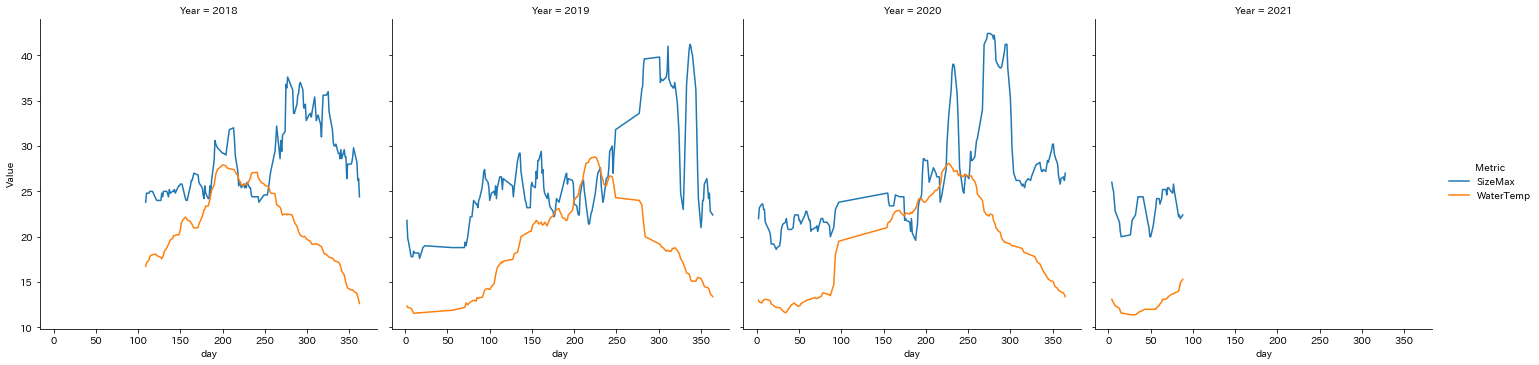

In [142]:
sns.relplot( data=df3, x="day", y="Value", hue="Metric", col="Year", kind="line")

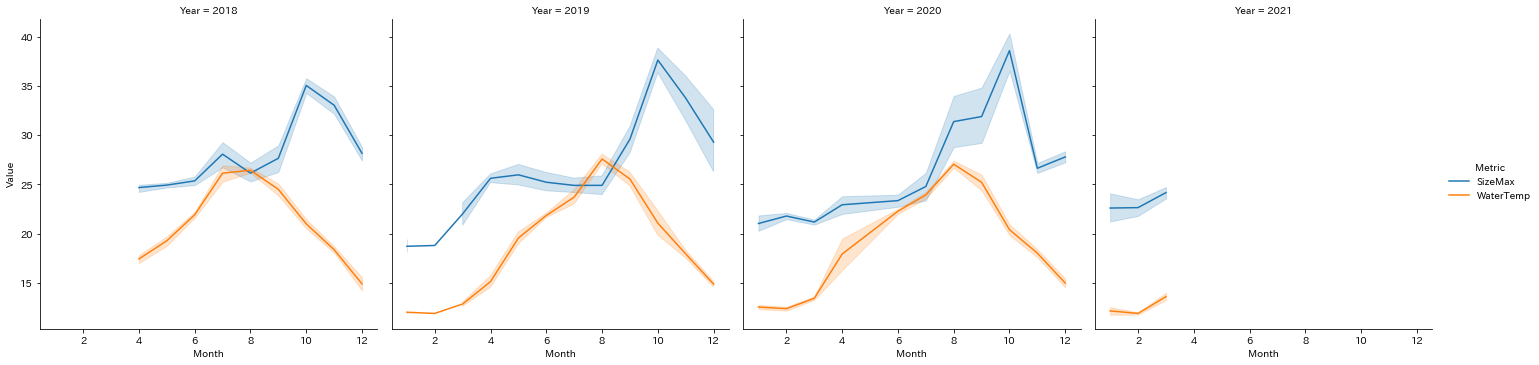

In [145]:
sns.relplot( data=df3, x="Month", y="Value", hue="Metric", col="Year", kind="line")

<AxesSubplot:xlabel='Month', ylabel='Value'>

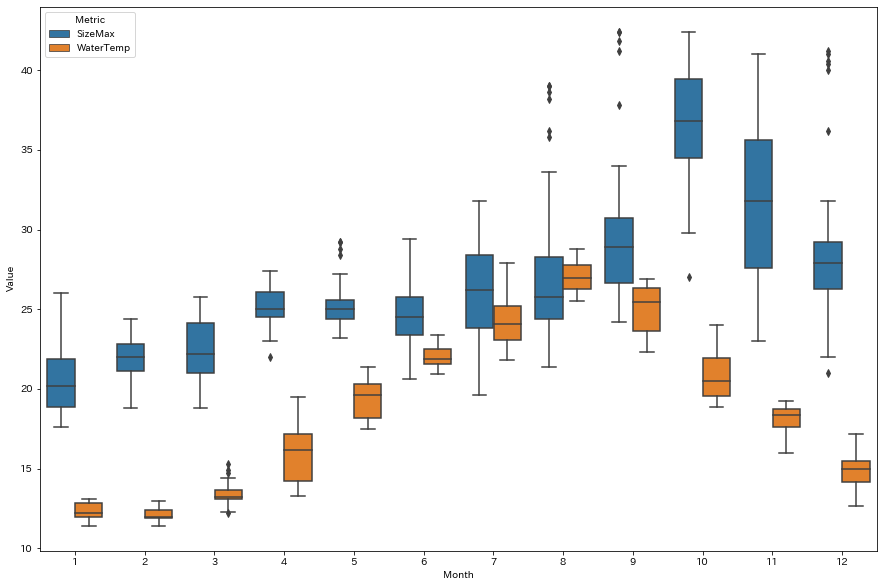

In [144]:
sns.boxplot(x="Month", y="Value",hue="Metric", data=df3)

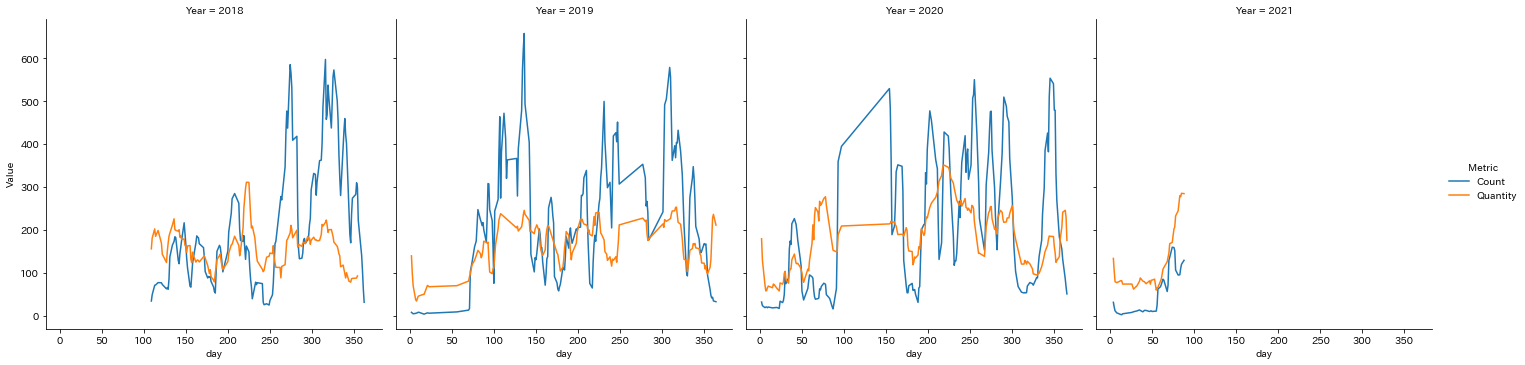

In [143]:
df4 = df2[['Count', 'Quantity']]
df4 = df4.stack()

df4 = df4.reset_index()
df4 = df4.set_index('Date')
df4.columns = ['Metric', 'Value']

df4['Year'] = df4.index.year
df4['Month'] = df4.index.month
df4['day'] = df4.index.dayofyear

sns.relplot( data=df4, x="day", y="Value", hue="Metric", col="Year", kind="line")

<AxesSubplot:xlabel='day'>

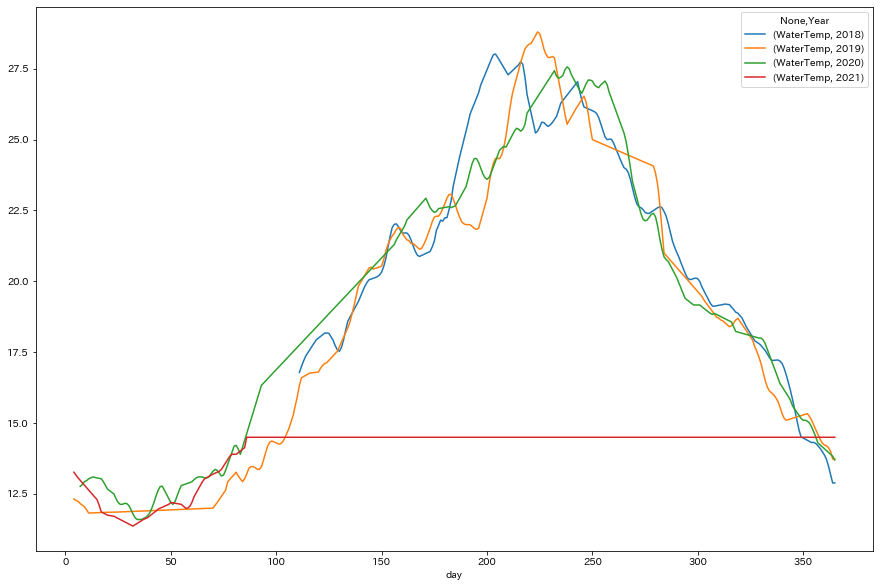

In [42]:
piv_temp = pd.pivot_table(df_y, index=['day'],columns=['Year'], values=['WaterTemp'])
piv_temp.rolling(3).mean().interpolate().plot()


<AxesSubplot:xlabel='day'>

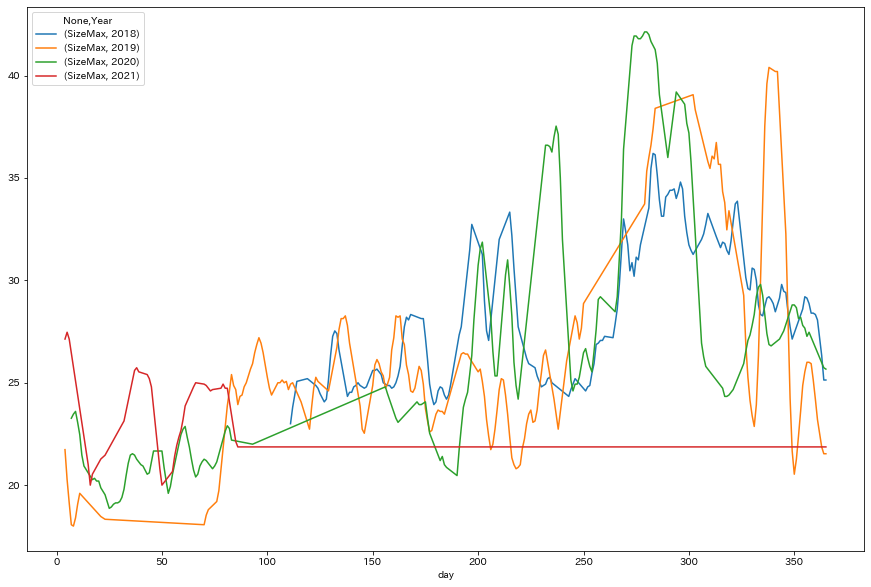

In [43]:
piv_size = pd.pivot_table(df_y, index=['day'],columns=['Year'], values=['SizeMax'])
piv_size.rolling(3).mean().interpolate().plot()

<AxesSubplot:>

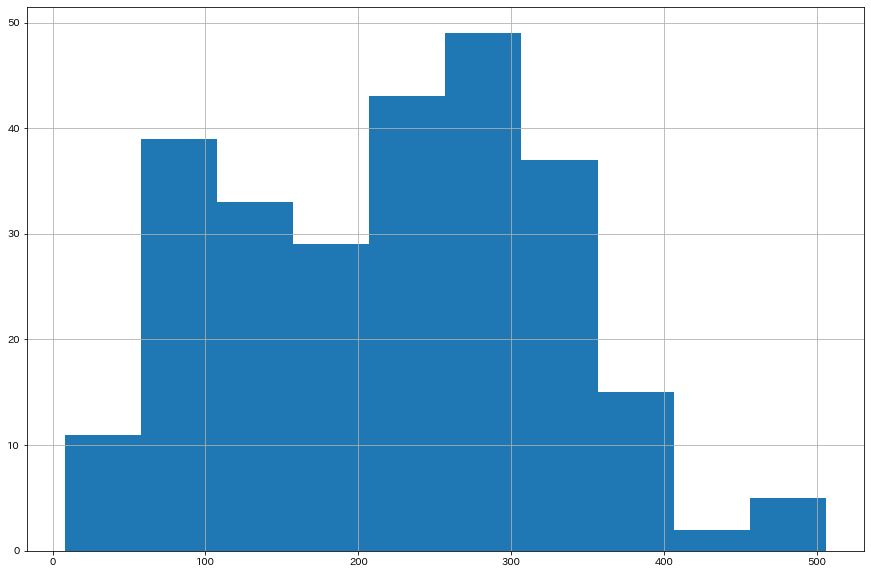

In [82]:
#df20 = df
#df20['Year'] = df20.index.year
df20 = df[df.index.year == 2020]
df20.Quantity.hist()

<AxesSubplot:xlabel='Date'>

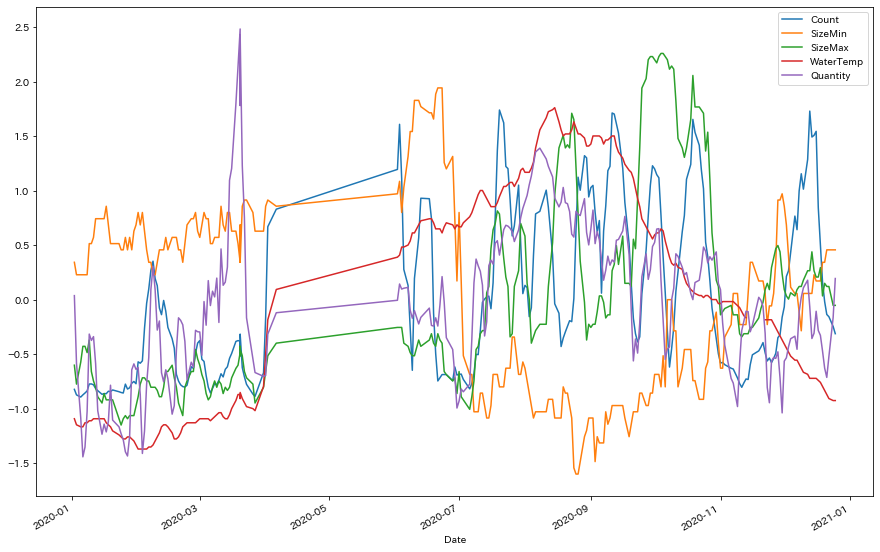

In [60]:
# 正規化
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(df20)
#df_mean_norm.plot()
df_mean_norm.rolling(window=5).mean().plot()


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

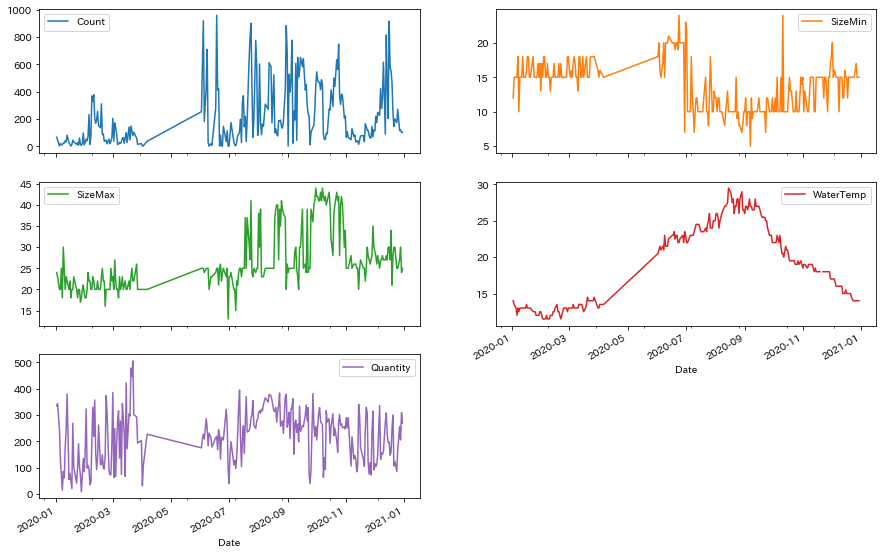

In [67]:
# 2020年度のグラフ
#df20.hist()
df20.plot(subplots=True, layout=(3,2))

<class 'seaborn.axisgrid.PairGrid'>


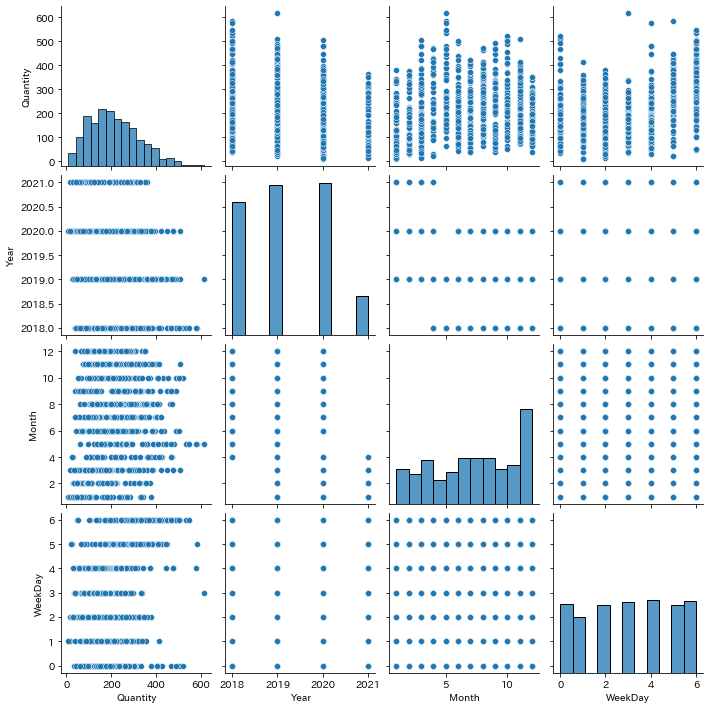

In [81]:
df_in = df
df_in['Year'] = df.index.year
df_in['Month'] = df.index.month
df_in['WeekDay'] = df.index.weekday
pg = sns.pairplot(df_in[['Quantity', 'Year', 'Month', 'WeekDay']])
print(type(pg))
#df_in.plot()

In [12]:
# 土日祝日化判定
import datetime
import jpholiday

def isBizDay(Date):
    #Date = datetime.date(int(DATE[0:4]), int(DATE[4:6]), int(DATE[6:8]))
    if Date.weekday() >= 5 or jpholiday.is_holiday(Date):
        return 0
    else:
        return 1



In [13]:
df20['Date']= df20.index
df20.head()
df20['BizDay'] = df20.apply(lambda x: isBizDay(x.Date), axis=1)


<ipython-input-13-5c31b1b92ae8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20['Date']= df20.index
<ipython-input-13-5c31b1b92ae8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20['BizDay'] = df20.apply(lambda x: isBizDay(x.Date), axis=1)


In [14]:
df20.head()

,Count,SizeMin,SizeMax,WaterTemp,Quantity,Date,BizDay
Date,,,,,,,
2020-12-30,102.0,15.0,25.0,14.0,269.0,2020-12-30,1
2020-12-29,102.0,15.0,24.0,14.0,309.0,2020-12-29,1
2020-12-28,122.0,15.0,30.0,14.0,205.0,2020-12-28,1
2020-12-27,115.0,17.0,27.0,14.0,256.0,2020-12-27,0
2020-12-25,272.0,15.0,25.0,14.0,168.0,2020-12-25,1
